In [1]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv(r"../../data/processed/dridex_static.csv")

df.drop("Is Encrypted Traffic", axis=1, inplace=True)

## EDA

In [3]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(60247, 33)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0
Max Payload Size,int64,0,0.0
Mean Entropy,float64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,3


### Categorical

In [4]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,5,TCP,50.01%
1,Flags,13,"PSH,ACK",37.54%
2,Label,2,Benign,50.01%
3,Direction,2,outbound,50.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,30127,50.005809
1,TLS,30108,49.974273
2,HTTP,9,0.014939
3,IRC,2,0.003320
4,MEDIA,1,0.001660


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,"PSH,ACK",22614,37.535479
1,"FIN,SYN,ACK",18709,31.053828
2,"SYN,ACK",7512,12.468671
3,"FIN,PSH,ACK",7506,12.458712
4,"SYN,RST,ACK",3373,5.598619
5,"FIN,SYN,RST,ACK",311,0.516208
6,"FIN,SYN,PSH,ACK",187,0.310389
7,"SYN,PSH,ACK",15,0.024898
8,"SYN,RST,PSH,ACK",10,0.016598
9,SYN,5,0.008299


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,30130,50.010789
1,Dridex,30117,49.989211


---

### Column: Direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,30126,50.004150
1,inbound,30121,49.995850


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,Min Entropy,Max Entropy,...,Is Source Common,Common Port Usage,Flags Count,Syn Count,Ack Count,Fin Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Mean,1.746243,4.029196,919.451525,249.201135,183.260428,87.526881,531.470712,2.268017,0.323411,3.544585,...,0.000183,0.000365,2.508274,0.500025,0.999900,0.443458,0.000149,0.625027,0.059223,0.000216
Median,0.638203,4.000000,1137.000000,229.142857,229.211693,42.000000,711.000000,1.562974,-1.368971,3.553142,...,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,0.016431,3.000000,182.000000,36.400000,4.800000,34.000000,46.000000,3.295622,3.295622,3.295622,...,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,9.129087,0.991027,913.070779,217.398950,197.770037,59.350401,533.898298,1.274256,3.163875,0.036823,...,0.013511,0.019106,0.517009,0.500004,0.009979,0.496797,0.012222,0.484120,0.236043,0.014688
Variance,83.340234,0.982134,833698.247986,47262.303390,39112.987659,3522.470109,285047.392392,1.623727,10.010107,0.001356,...,0.000183,0.000365,0.267298,0.250004,0.000100,0.246807,0.000149,0.234372,0.055716,0.000216
Range,257.057723,37.000000,52787.000000,1356.026316,716.254697,1134.000000,1460.000000,6.658196,15.450289,0.553356,...,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,0.000001,1.000000,34.000000,34.000000,-85.769169,34.000000,34.000000,-2.466680,-10.487565,3.099287,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,257.057724,38.000000,52821.000000,1390.026316,630.485527,1168.000000,1494.000000,4.191516,4.962724,3.652643,...,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,Min Entropy,Max Entropy,...,Is Source Common,Common Port Usage,Flags Count,Syn Count,Ack Count,Fin Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Duration,1.000000,0.014311,-0.063297,-0.063530,-0.056527,-0.056516,-0.060822,-0.105839,-0.099644,-0.261228,...,-0.002028,0.025707,0.027994,0.065209,-0.006289,0.005477,-0.002338,-0.009577,-0.047534,-0.002810
Packets,0.014311,1.000000,-0.066157,-0.392810,-0.288961,-0.576441,-0.254417,-0.560690,-0.560578,-0.447122,...,0.013238,0.003820,0.782940,0.538622,0.013721,0.676129,-0.037362,-0.238489,0.239964,-0.044905
Bytes,-0.063297,-0.066157,1.000000,0.912289,0.921447,0.581187,0.949245,0.790330,0.789295,0.702187,...,0.062465,0.037308,-0.085994,-0.811535,0.008767,0.009414,-0.007811,-0.107753,0.539022,-0.008214
Mean Payload Size,-0.063530,-0.392810,0.912289,1.000000,0.971070,0.763003,0.977592,0.938078,0.936370,0.836625,...,0.008600,0.002755,-0.362245,-0.968732,0.009471,-0.252529,0.004880,-0.087186,0.378854,0.010793
Std Payload Size,-0.056527,-0.288961,0.921447,0.971070,1.000000,0.620800,0.993792,0.872674,0.872703,0.758915,...,-0.002390,-0.005380,-0.261397,-0.898005,0.009150,-0.160966,0.002988,-0.208437,0.408575,-0.002600
Min Payload Size,-0.056516,-0.576441,0.581187,0.763003,0.620800,1.000000,0.648615,0.835574,0.829944,0.796241,...,0.033889,0.037508,-0.536200,-0.876655,0.007880,-0.440526,0.051174,0.213875,0.069307,0.079556
Max Payload Size,-0.060822,-0.254417,0.949245,0.977592,0.993792,0.648615,1.000000,0.877237,0.876681,0.770901,...,-0.002078,-0.007813,-0.229178,-0.903026,0.009112,-0.126391,-0.004475,-0.161064,0.448570,-0.003372
Mean Entropy,-0.105839,-0.560690,0.790330,0.938078,0.872674,0.835574,0.877237,1.000000,0.999810,0.832290,...,0.001407,-0.003208,-0.470339,-0.962751,0.002627,-0.399187,0.009807,0.017398,0.249117,0.009039
Min Entropy,-0.099644,-0.560578,0.789295,0.936370,0.872703,0.829944,0.876681,0.999810,1.000000,0.822146,...,0.002467,-0.001356,-0.467084,-0.959730,0.002514,-0.399485,0.011463,0.016144,0.249625,0.010499
Max Entropy,-0.261228,-0.447122,0.702187,0.836625,0.758915,0.796241,0.770901,0.832290,0.822146,1.000000,...,-0.060780,-0.094245,-0.457753,-0.873932,0.003900,-0.302813,-0.084387,-0.002845,0.224008,-0.072354


### Correlation Matrix Heatmap:

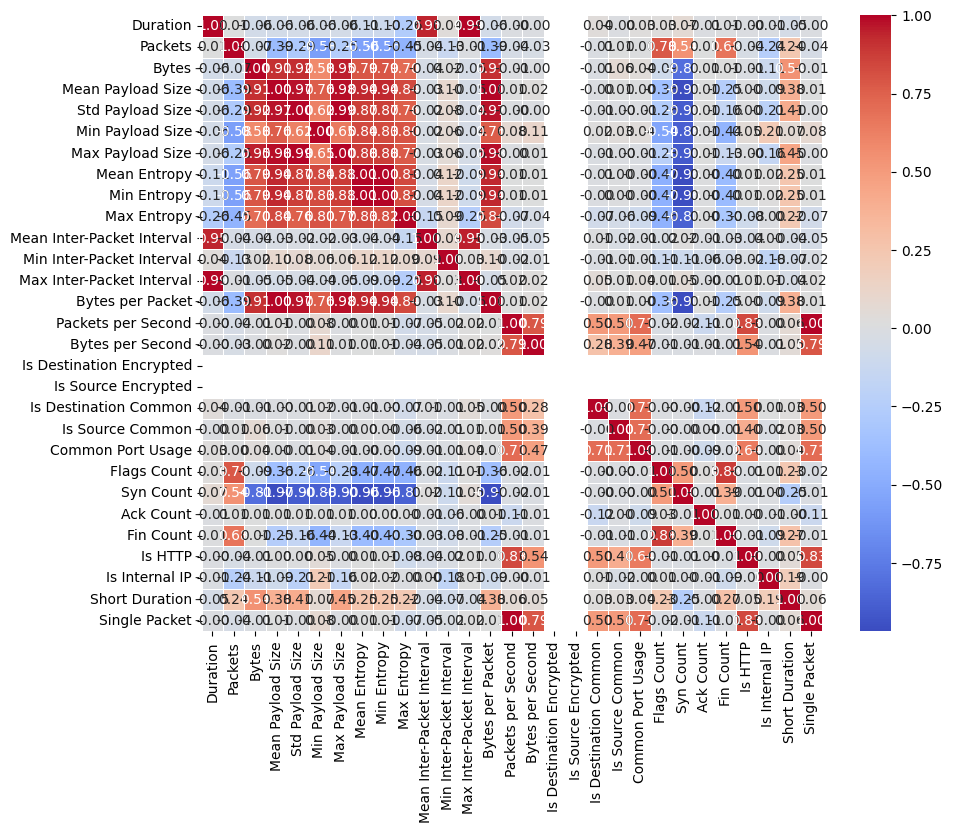

In [5]:
info.numerical_summary()

## Modeling

#### Encoding

In [6]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "Direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

#### Type Casting

In [7]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["Flags Count"] = df["Flags Count"].astype("float64")

### Data Splitting

In [8]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

df["Label"] = label_column

## Models

### Model Creation and Parameters

In [9]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_estimators = 7
dt_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [10]:
df_reset = df.reset_index(drop=True)
X = df_reset.drop("Label", axis=1)
y = df["Label"]

### KNN

In [11]:
dt_normal = prisma.MachineLearning()
dt_normal_metrics, avg_dt_normal_metrics, dt_normal_model = (
    dt_normal.evaluate_model(X, y, test_size, iterations, dt_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:08<00:00,  3.39it/s]


### Random Forest

In [12]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model: 100%|██████████| 30/30 [01:47<00:00,  3.57s/it]


### Logistic Regression

In [13]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:12<00:00,  2.44it/s]


### Model Evaluation

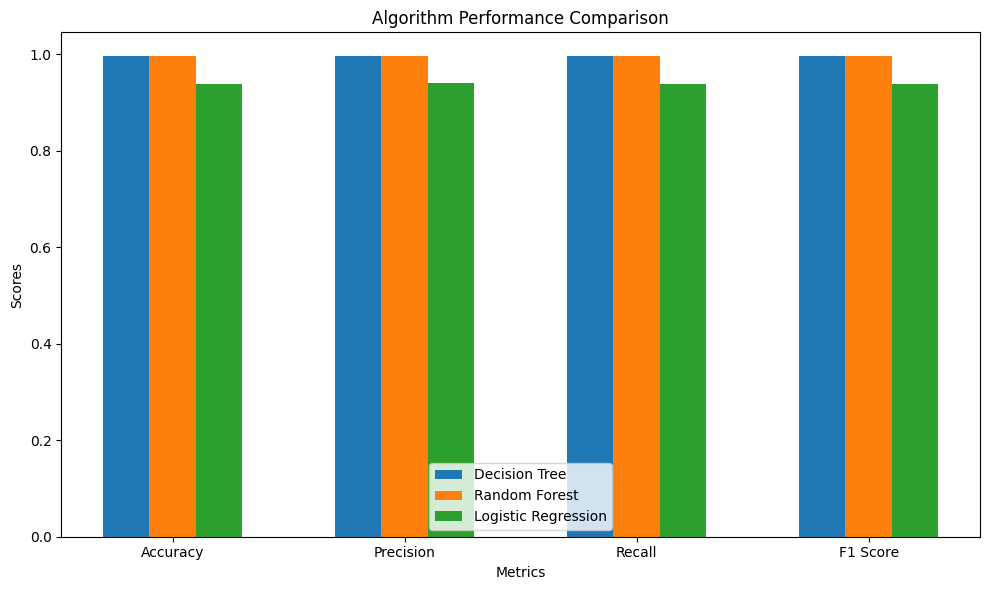

In [14]:
normal_metrics = {"Decision Tree":avg_dt_normal_metrics, "Random Forest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [15]:
normal_metrics

{'Decision Tree': {'Accuracy': 0.996,
  'Precision': 0.996,
  'Recall': 0.996,
  'F1 Score': 0.996},
 'Random Forest': {'Accuracy': 0.996,
  'Precision': 0.996,
  'Recall': 0.996,
  'F1 Score': 0.996},
 'Logistic Regression': {'Accuracy': 0.939,
  'Precision': 0.94,
  'Recall': 0.939,
  'F1 Score': 0.939}}

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

X_lstm = np.expand_dims(X, axis=1)

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y, test_size=0.2, random_state=42, stratify=y
)

model = Sequential(
    [
        LSTM(
            128,
            input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),
            return_sequences=True,
        ),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(
            y.shape[1] if len(y.shape) > 1 else 1,
            activation="sigmoid",
        ),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    X_train_lstm,
    y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=200,
    batch_size=64,
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

2025-01-17 22:16:39.055641: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 22:16:39.243241: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 22:16:39.429292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737141399.575630  150379 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737141399.616870  150379 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 22:16:40.004801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/200


2025-01-17 22:16:43.748774: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


754/754 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8500 - loss: 0.2914 - val_accuracy: 0.9388 - val_loss: 0.0909
Epoch 2/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9429 - loss: 0.0920 - val_accuracy: 0.9375 - val_loss: 0.0801
Epoch 3/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9471 - loss: 0.0889 - val_accuracy: 0.9837 - val_loss: 0.0628
Epoch 4/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9493 - loss: 0.0851 - val_accuracy: 0.9827 - val_loss: 0.0562
Epoch 5/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9583 - loss: 0.0778 - val_accuracy: 0.9720 - val_loss: 0.0632
Epoch 6/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9677 - loss: 0.0709 - val_accuracy: 0.9952 - val_loss: 0.0292
Epoch 7/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9867 - loss: 0.0388 - val_accuracy: 0.9932 - val_loss: 0.0269
Epoch 8/200
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9883 - loss: 0.0345 - val_accuracy: 0.9946

377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6026
           1       1.00      0.99      1.00      6024

    accuracy                           1.00     12050
   macro avg       1.00      1.00      1.00     12050
weighted avg       1.00      1.00      1.00     12050



<Figure size 800x600 with 0 Axes>

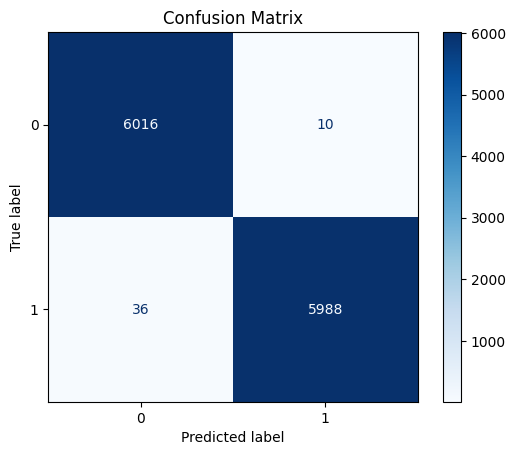

In [18]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
y_pred_lstm = model.predict(X_test_lstm)

# Convert predictions to binary labels (for binary classification)
y_pred_binary = (y_pred_lstm > 0.5).astype(int).flatten()

print("\nClassification Report:")
report = classification_report(y_test_lstm, y_pred_binary)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_lstm, y_pred_binary)

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

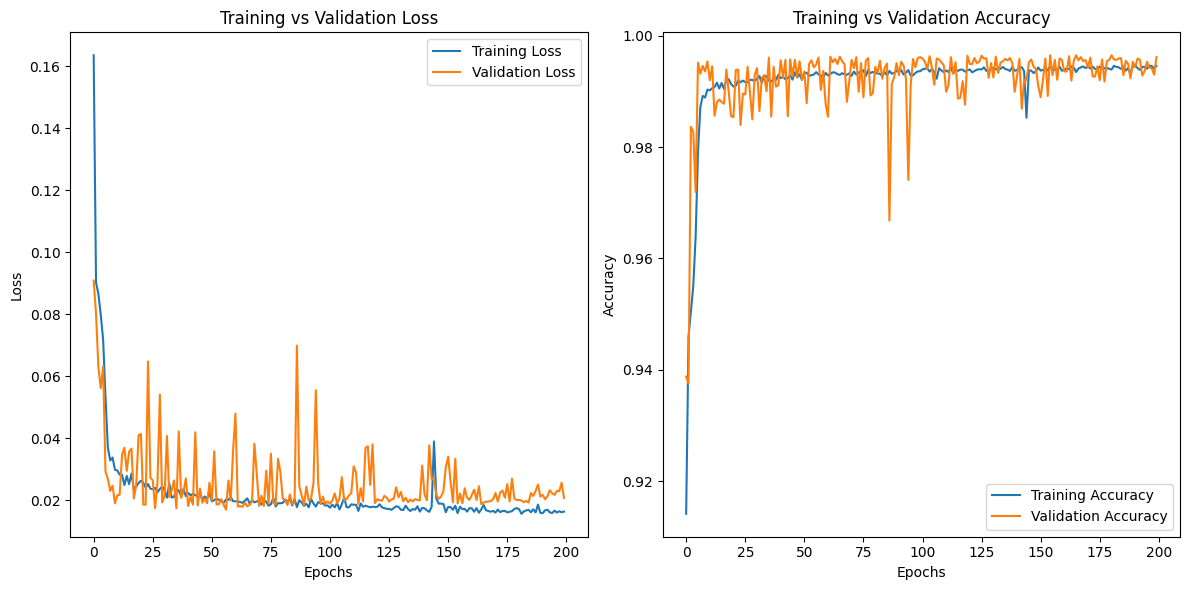

In [19]:
epochs = len(history.history["loss"])
epoch_ticks = np.arange(0, epochs, 25)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_ticks, history.history["loss"][::25], label="Training Loss")
plt.plot(epoch_ticks, history.history["val_loss"][::25], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epoch_ticks)
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epoch_ticks, history.history["accuracy"][::25], label="Training Accuracy")
plt.plot(epoch_ticks,history.history["val_accuracy"][::25], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epoch_ticks)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    grid_rf.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()